# Machine Learning For Finance - Chapter 1

This Kernel contains the code samples for the chapter 1 of my [Machine Learning For Finance book](https://www.amazon.com/Machine-Learning-Finance-algorithms-financial/dp/1789136369/ref=sr_1_4?ie=UTF8&qid=1523854999&sr=8-4&keywords=machine+learning+for+finance).  Note that the original text feature far more text, explanations and figures. This notebook only features the code and some related comments. 
If you enjoy this content, take a look at the [book](https://www.amazon.com/Machine-Learning-Finance-algorithms-financial/dp/1789136369/ref=sr_1_4?ie=UTF8&qid=1523854999&sr=8-4&keywords=machine+learning+for+finance)

# A logistic regressor
The simplest neural network is a logistic regressor. Logistic regression takes in values of any range but outputs only values between zero and one. There are many applications for logistic regressors. One example use case is to predict the likelihood of a homeowner to default on a mortgage. We might take all kinds of values into account to predict the likelihood of default, the debtor’s salary, whether she has a car, the security of her job, etc., but the likelihood will always be a value between zero and one. Even the worst debtor ever cannot have a default likelihood above 100% and the best cannot go below 0%.

We will use a library called numpy which enables easy and fast matrix operations in Python. To ensure we get the same result in all of our experiments, we have to set a random seed.

In [1]:
import numpy as np
np.random.seed(1)

Since our dataset is quite small, we define it manually as numpy matrices. 

In [2]:
X = np.array([[0,1,0],
              [1,0,0],
              [1,1,1],
              [0,1,1]])

y = np.array([[0,1,1,0]]).T

To compute the output of the regressor, we must first do a linear step. We compute the dot product of the input X and the weights W. This is the same as multiplying each value of X with its weight and then taking the sum. To this number, we add the bias b. Afterwards, we do a nonlinear step. In the nonlinear step, we run the linear intermediate product z through an activation function, in this case, the sigmoid function. The sigmoid function squishes input values to outputs between zero and one.

We can define the sigmoid activation function as a Python function.

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

So far, so good. Now we need to initialize W. In this case, we actually know already which values W should have. But we cannot know for other problems where we do not know the function yet. So, we have to assign weights randomly. The weights are usually assigned randomly with a mean of zero. The bias is usually set to zero by default. Numpys `random` function expects to recieve the shape of the random matrix to be passed on as a tuple so `random((3,1))` creates a 3 by 1 matrix. By default, the random values generated are between zero and one, with a mean of 0.5 and a standard deviation of 0.5. We want the random values to have a mean of 0 and a standard deviation of 1, so we first multiply the values generated by 2 and then subtract 1.

In [4]:
W = 2*np.random.random((3,1)) - 1
b = 0

Now that all variables are set, we can do the linear step:

In [5]:
z = X.dot(W) + b

And the nonlinear step:

In [6]:
A = sigmoid(z)

If we print out `A` now, we get the following output:

In [7]:
print(A)

[[0.60841366]
 [0.45860596]
 [0.3262757 ]
 [0.36375058]]


This looks nothing like our desired output y at all! Clearly, our regressor is representing some function, but it is quite far away from the function we want. 
To better approximate our desired function, we have to tweak the weights W and the bias b to get better results.

In this case, our problem is a binary classification problem, so we will use the binary cross entropy loss:
$$D_{BCE}(y,\hat y) = -\frac{1}{N} \sum_{i = i}^N[y_i  log(\hat y_i) + (1-y_i)log(1-\hat y_i)]$$

Let's go through this step by step.
 
 1. $D_{BCE}(y,\hat y)$ is the distance function for binary cross entropy loss.
 
 
 2. $-\frac{1}{N} \sum_{i=1}^N$ The loss over a batch of N examples is the average loss of all examples. 
 
 
 3. $y_i * \log \hat y_i$ This part of the loss only comes into play if the true value, $y_i$ is 1. If $y_i$ is 1, we want $\hat y_i$ to be as close to 1 as possible, to achieve a low loss.
 
 
 4. $(1-y_i)\log(1-\hat y_i)$ This part of the loss comes into play if $y_i$ is 0. If so, we want $\hat y_i$ to be close to 0 as well.

In Python this loss function is implemented as follows:

In [8]:
def bce_loss(y,y_hat):
  N = y.shape[0]
  loss = -1/N * np.sum((y*np.log(y_hat) + (1 - y)*np.log(1-y_hat)))
  return loss 

bce = BINARY CROSS ENTNROPY LOSS

In [9]:
bce_loss(y,A)

0.8223225820877986

## Backpropagation 

To update the parameters, we need to calculate the derivative of the loss function with respect to the weights and biases. If you imagine the parameters of our models like the geo coordinates in our mountain analogy, calculating the loss derivative with respect to a parameter is like checking the mountain slope in the direction north to see whether you should go north or south.

Note: to keep things simple, we refer to the derivative of the loss function to any variable as $d$variable. For example we write the derivative of the loss function with respect to the weights as $dW$.

To calculate the gradient with respect to different parameters of our model, we can make use of the chain rule. You might remember the chain rule as:

$$(f(g(x)))' = g(x)' * f'(g(x))$$

Sometimes also written as:
$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}$$

What the chain rule basically says is that if you want to take the derivative through a number of nested functions you multiply the derivative of the inner function with the derivative of the outer function. This is useful since neural networks, and our logistic regressor, are nested functions. The input goes through the linear step, a function of input, weights and biases. The output of the linear step, $z$ goes through the activation function.

So when we compute the loss derivative with respect to weights and bias, we first compute the loss derivative with respect to the output of the linear step $z$, and use it to compute the $dW$. In code it looks like this:
```python
dz = (A - y)

dW = 1/N * np.dot(X.T,dz)

db = 1/N * np.sum(dz,axis=0,keepdims=True)     
```

## Parameter updates
Now we have the gradients, how do we improve our model? Or, to stay with our mountain analogy, now that we know that the mountain goes up in the North direction and up in the East direction, where do we go? To the South and to the West of course! Mathematically speaking, we go in the opposite direction than the gradient. If the gradient is positive with respect to a parameter, speak the slope is upward, we reduce the parameter. If it is negative, speak downward sloping, we increase it. When our slope is steeper, we move our gradient more.

The update rule for a parameter p then goes like:
$$p = p - \alpha * dp$$

Where $p$ is a model parameter (either a weight or a bias), $dp$ is the loss derivative with respect to $p$ and $\alpha$ is the **learning rate**. The learning rate is something like the gas pedal in a car. It sets how much we want to apply the gradient updates. It is one of those hyper parameters that we have to set manually. We will discuss it in the next chapter.

In [10]:

# Randomly initialize the weights
W = 2*np.random.random((3,1)) - 1
b = 0

# Set the learning rate alpha to 1
alpha = 1

# We will train for 20 epochs
epochs = 20

# Count the number of training examples we have (4)
N = y.shape[0]

In the loop below we do multiple forward and backward passes and apply the gradient descent update rule.

In [12]:
losses = []
for i in range(epochs):
    # Do the linear step
    z = X.dot(W) + b
    
    # Do the non linear step
    A = sigmoid(z)
    
    # Calculate the loss
    loss = bce_loss(y,A)
    
    # Keep track of the loss
    print('Epoch:',i,'Loss:',loss)
    losses.append(loss)
    
    # Back propagate
    dz = (A - y)
    
    # ... calcualte loss derivative with respect to weights
    dW = 1/N * np.dot(X.T,dz)
    
    # ... calculate loss derivative with respect to bias
    db = 1/N * np.sum(dz,axis=0,keepdims=True)    
    
    # Update parameters
    W -= alpha * dW
    b -= alpha * db

Epoch: 0 Loss: 0.19117605265005463
Epoch: 1 Loss: 0.18376219594591212
Epoch: 2 Loss: 0.17687318179769754
Epoch: 3 Loss: 0.1704573463101309
Epoch: 4 Loss: 0.16446937307524706
Epoch: 5 Loss: 0.15886937444854893
Epoch: 6 Loss: 0.15362212397871977
Epoch: 7 Loss: 0.14869641239686848
Epoch: 8 Loss: 0.144064505064609
Epoch: 9 Loss: 0.13970168309660466
Epoch: 10 Loss: 0.13558585378112548
Epoch: 11 Loss: 0.13169721862557052
Epoch: 12 Loss: 0.12801798950829585
Epoch: 13 Loss: 0.12453214514263389
Epoch: 14 Loss: 0.12122522144544082
Epoch: 15 Loss: 0.11808413052184086
Epoch: 16 Loss: 0.11509700388520457
Epoch: 17 Loss: 0.11225305626985262
Epoch: 18 Loss: 0.10954246699727134
Epoch: 19 Loss: 0.10695627635133606


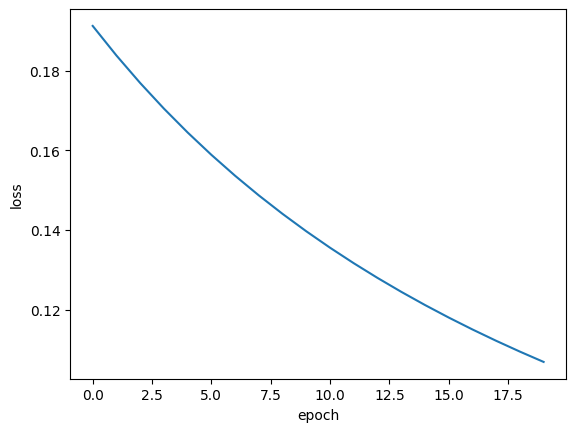

In [13]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
#fig.savefig('loss.jpg')

# A deeper network 
We established earlier that in order to approximate more complex functions, we need bigger, deeper networks. Creating a deeper networks works by stacking layers on top of each other.

In this section we will build a 2 layer neural network

The input gets multiplied with the first set of weights $W_1$, producing an intermediate product $z_1$ and then run through an activation function to produce the first layers activations $A_1$. These activations then get multiplied with a second layer of weights $W_2$, producing an intermediate product $z_2$ which gets run through a second activation function which produces the output $A_2$ of our neural net.

In [14]:
# Package imports
# Matplotlib is a matlab like plotting library
import matplotlib
import matplotlib.pyplot as plt
# Numpy handles matrix operations
import numpy as np
# SciKitLearn is a useful machine learning utilities library
import sklearn
# The sklearn dataset module helps generating datasets
import sklearn.datasets
import sklearn.linear_model


# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [15]:
# Just some helper functions we moved over from the last chapter
# sigmoid function
def sigmoid(x):
    '''
    Calculates the sigmoid activation of a given input x
    See: https://en.wikipedia.org/wiki/Sigmoid_function
    '''
    return 1/(1+np.exp(-x))

#Log Loss function
def bce_loss(y,y_hat):
    '''
    Calculates the logistic loss between a prediction y_hat and the labels y
    See: http://wiki.fast.ai/index.php/Log_Loss

    We need to clip values that get too close to zero to avoid zeroing out. 
    Zeroing out is when a number gets so small that the computer replaces it with 0.
    Therefore, we clip numbers to a minimum value.
    '''
    minval = 0.000000000001
    N = y.shape[0]
    l = -1/N * np.sum(y * np.log(y_hat.clip(min=minval)) + (1-y) * np.log((1-y_hat).clip(min=minval)))
    return l

# Log loss derivative
def bce_loss_derivative(y,y_hat):
    '''
    Calculates the gradient (derivative) of the log loss between point y and y_hat
    See: https://stats.stackexchange.com/questions/219241/gradient-for-logistic-loss-function
    '''
    return (y_hat-y)


In [16]:
def forward_prop(model,a0):
    '''
    Forward propagates through the model, stores results in cache.
    See: https://stats.stackexchange.com/questions/147954/neural-network-forward-propagation
    A0 is the activation at layer zero, it is the same as X
    '''
    
    # Load parameters from model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Linear step
    z1 = a0.dot(W1) + b1
    
    # First activation function
    a1 = np.tanh(z1)
    
    # Second linear step
    z2 = a1.dot(W2) + b2
    
    # Second activation function
    a2 = sigmoid(z2)
    cache = {'a0':a0,'z1':z1,'a1':a1,'z1':z1,'a2':a2}
    return cache

In [17]:
def tanh_derivative(x):
    '''
    Calculates the derivative of the tanh function that is used as the first activation function
    See: https://socratic.org/questions/what-is-the-derivative-of-tanh-x
    '''
    return (1 - np.power(x, 2))

In [18]:
def backward_prop(model,cache,y):
    '''
    Backward propagates through the model to calculate gradients.
    Stores gradients in grads dictionary.
    See: https://en.wikipedia.org/wiki/Backpropagation
    '''
    # Load parameters from model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Load forward propagation results
    a0,a1, a2 = cache['a0'],cache['a1'],cache['a2']
    
    # Backpropagation
    # Calculate loss derivative with respect to output
    dz2 = bce_loss_derivative(y=y,y_hat=a2)
    
    # Calculate loss derivative with respect to second layer weights
    dW2 = (a1.T).dot(dz2)
    
    # Calculate loss derivative with respect to second layer bias
    db2 = np.sum(dz2, axis=0, keepdims=True)
    
    # Calculate loss derivative with respect to first layer
    dz1 = dz2.dot(W2.T) * tanh_derivative(a1)
    
    # Calculate loss derivative with respect to first layer weights
    dW1 = np.dot(a0.T, dz1)
    
    # Calculate loss derivative with respect to first layer bias
    db1 = np.sum(dz1, axis=0)
    
    # Store gradients
    grads = {'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

In [20]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral)

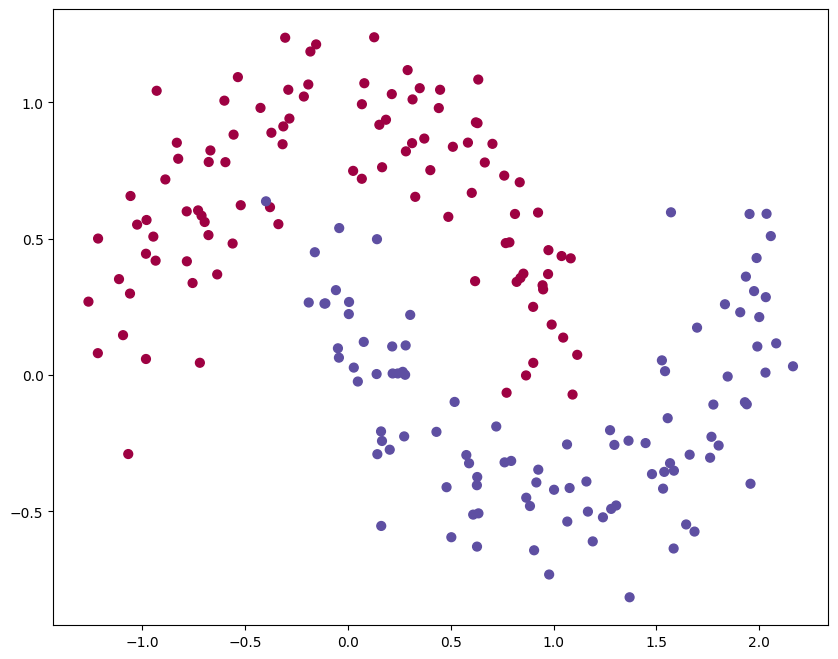

In [21]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)
y = y.reshape(200,1)
plt.scatter(X[:,0], X[:,1], s=40, c=y.flatten(), cmap=plt.cm.Spectral)


In [22]:
def predict(model, x):
    '''
    Predicts y_hat as 1 or 0 for a given input X
    '''
    # Do forward pass
    c = forward_prop(model,x)
    #get y_hat
    y_hat = c['a2']
    
    # Turn values to either 1 or 0
    y_hat[y_hat > 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    return y_hat

In [23]:
def calc_accuracy(model,x,y):
    '''
    Calculates the accuracy of the model given an input x and a correct output y.
    The accuracy is the percentage of examples our model classified correctly
    '''
    # Get total number of examples
    m = y.shape[0]
    # Do a prediction with the model
    pred = predict(model,x)
    # Ensure prediction and truth vector y have the same shape
    pred = pred.reshape(y.shape)
    # Calculate the number of wrong examples
    error = np.sum(np.abs(pred-y))
    # Calculate accuracy
    return (m - error)/m * 100

In [24]:
def initialize_parameters(nn_input_dim,nn_hdim,nn_output_dim):
    '''
    Initializes weights with random number between -1 and 1
    Initializes bias with 0
    Assigns weights and parameters to model
    '''
    # First layer weights
    W1 = 2 *np.random.randn(nn_input_dim, nn_hdim) - 1
    
    # First layer bias
    b1 = np.zeros((1, nn_hdim))
    
    # Second layer weights
    W2 = 2 * np.random.randn(nn_hdim, nn_output_dim) - 1
    
    # Second layer bias
    b2 = np.zeros((1, nn_output_dim))
    
    # Package and return model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [26]:
def update_parameters(model,grads,learning_rate):
    '''
    Updates parameters accoarding to gradient descent algorithm
    See: https://en.wikipedia.org/wiki/Gradient_descent
    '''
    # Load parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Update parameters
    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']
    
    # Store and return parameters
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [27]:
def train(model,X_,y_,learning_rate, num_passes=20000, print_loss=False):
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        cache = forward_prop(model,X_)
        #a1, probs = cache['a1'],cache['a2']
        # Backpropagation
        
        grads = backward_prop(model,cache,y)
        # Gradient descent parameter update
        # Assign new parameters to the model
        model = update_parameters(model=model,grads=grads,learning_rate=learning_rate)
    
        # Pring loss & accuracy every 100 iterations
        if print_loss and i % 100 == 0:
            y_hat = cache['a2']
            print('Loss after iteration',i,':',bce_loss(y,y_hat))
            print('Accuracy after iteration',i,':',calc_accuracy(model,X_,y_),'%')
    
    return model

## Little noise and a good hidden size
In this section, we will fit a model with a good hidden layer size to data with little noise

In [28]:
# Hyper parameters
hiden_layer_size = 3
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

In [29]:
# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 0.7590872634269913
Accuracy after iteration 0 : 86.5 %
Loss after iteration 100 : 0.2574839032266012
Accuracy after iteration 100 : 87.5 %
Loss after iteration 200 : 0.23296065120431445
Accuracy after iteration 200 : 91.0 %
Loss after iteration 300 : 0.0660746943561243
Accuracy after iteration 300 : 98.5 %
Loss after iteration 400 : 0.039048891767394636
Accuracy after iteration 400 : 99.0 %
Loss after iteration 500 : 0.031623556579343175
Accuracy after iteration 500 : 99.5 %
Loss after iteration 600 : 0.028083469344578244
Accuracy after iteration 600 : 99.5 %
Loss after iteration 700 : 0.025967242193864787
Accuracy after iteration 700 : 99.5 %
Loss after iteration 800 : 0.02453302540660478
Accuracy after iteration 800 : 99.5 %
Loss after iteration 900 : 0.02348000119042627
Accuracy after iteration 900 : 99.5 %


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

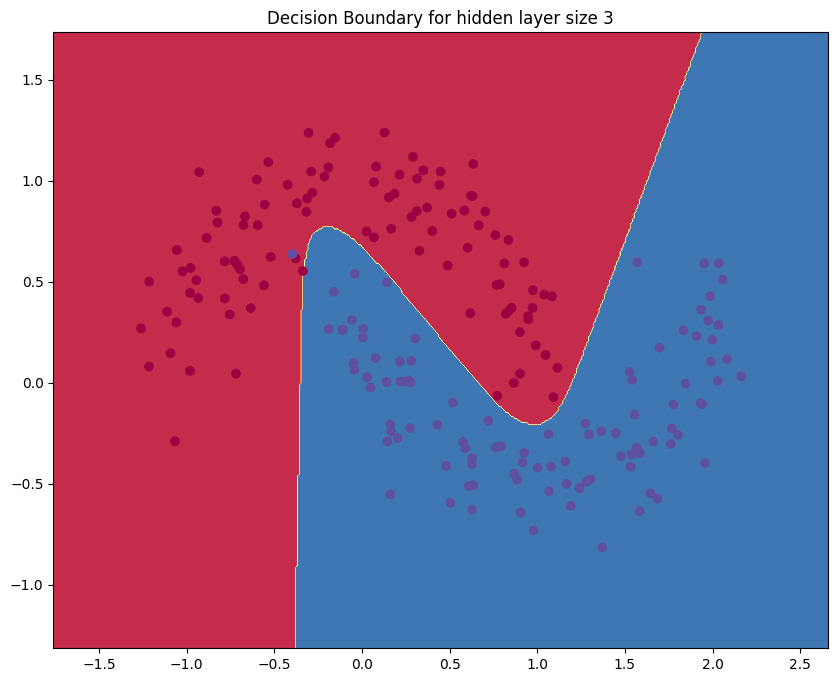

In [30]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 3")

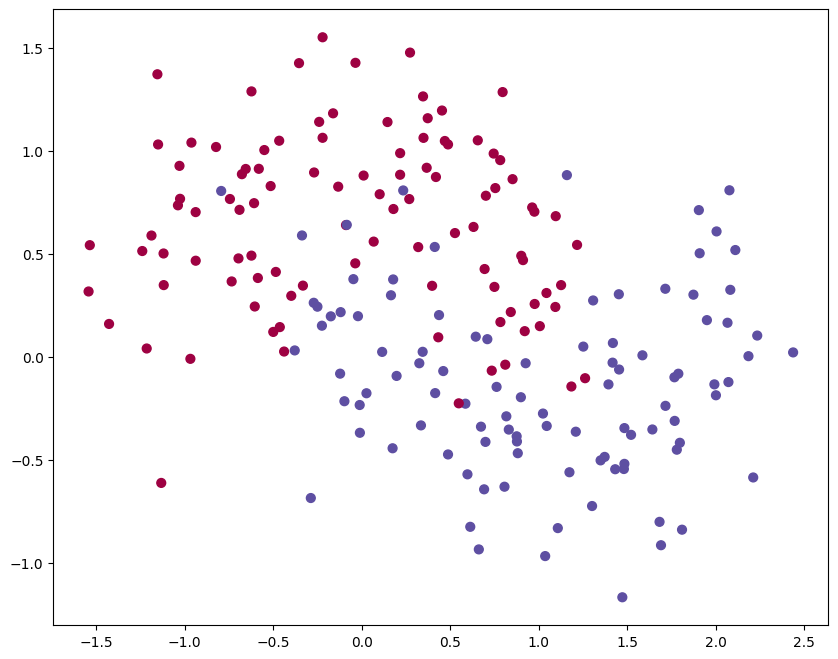

In [31]:
# Now with more noise
# Generate a dataset and plot it
np.random.seed(0)
# The data generator alows us to regulate the noise level
X, y = sklearn.datasets.make_moons(200, noise=0.3)
y = y.reshape(200,1)
plt.scatter(X[:,0], X[:,1], s=40, c=y.flatten(), cmap=plt.cm.Spectral)

## Too small hidden size
In this section, the hidden layer size is 1, which is too small. The data also has more noise.

In [32]:
# Hyper parameters
hiden_layer_size = 1
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 0.5961576235993598
Accuracy after iteration 0 : 68.5 %
Loss after iteration 100 : 0.35763382053515996
Accuracy after iteration 100 : 83.5 %
Loss after iteration 200 : 0.3770127441749104
Accuracy after iteration 200 : 83.5 %
Loss after iteration 300 : 0.37696043312187927
Accuracy after iteration 300 : 83.5 %
Loss after iteration 400 : 0.3769528337781058
Accuracy after iteration 400 : 83.5 %
Loss after iteration 500 : 0.3769513245813505
Accuracy after iteration 500 : 83.5 %
Loss after iteration 600 : 0.3769510105490256
Accuracy after iteration 600 : 83.5 %
Loss after iteration 700 : 0.37695094453288575
Accuracy after iteration 700 : 83.5 %
Loss after iteration 800 : 0.3769509306246626
Accuracy after iteration 800 : 83.5 %
Loss after iteration 900 : 0.3769509276931423
Accuracy after iteration 900 : 83.5 %


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 1')

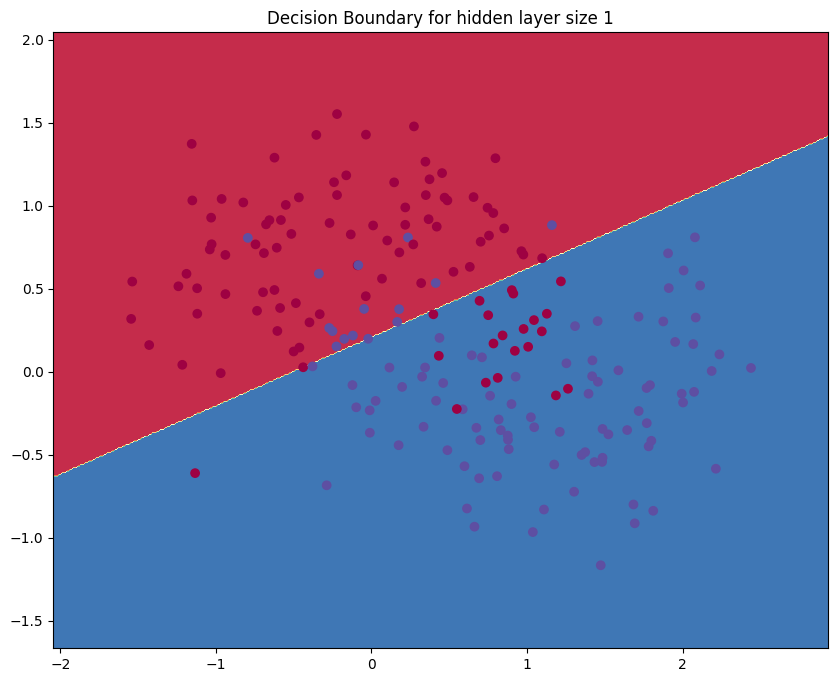

In [33]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 1")

## Too large hidden layer size
In this section, the hidden layer size is too large and the model fits the noise.

In [34]:
# Hyper parameters
hiden_layer_size = 500
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 13.066488880281316
Accuracy after iteration 0 : 60.5 %
Loss after iteration 100 : 3.8831819978224775
Accuracy after iteration 100 : 81.0 %
Loss after iteration 200 : 1.30818207531488
Accuracy after iteration 200 : 88.0 %
Loss after iteration 300 : 1.2317362364867657
Accuracy after iteration 300 : 91.0 %
Loss after iteration 400 : 3.9140813217754817
Accuracy after iteration 400 : 91.0 %
Loss after iteration 500 : 2.480059235344591
Accuracy after iteration 500 : 91.5 %
Loss after iteration 600 : 2.82935726633526
Accuracy after iteration 600 : 92.5 %
Loss after iteration 700 : 0.4280437517181288
Accuracy after iteration 700 : 92.0 %
Loss after iteration 800 : 1.2709936751447257
Accuracy after iteration 800 : 93.5 %
Loss after iteration 900 : 2.0077339546476565
Accuracy after iteration 900 : 92.0 %


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 500')

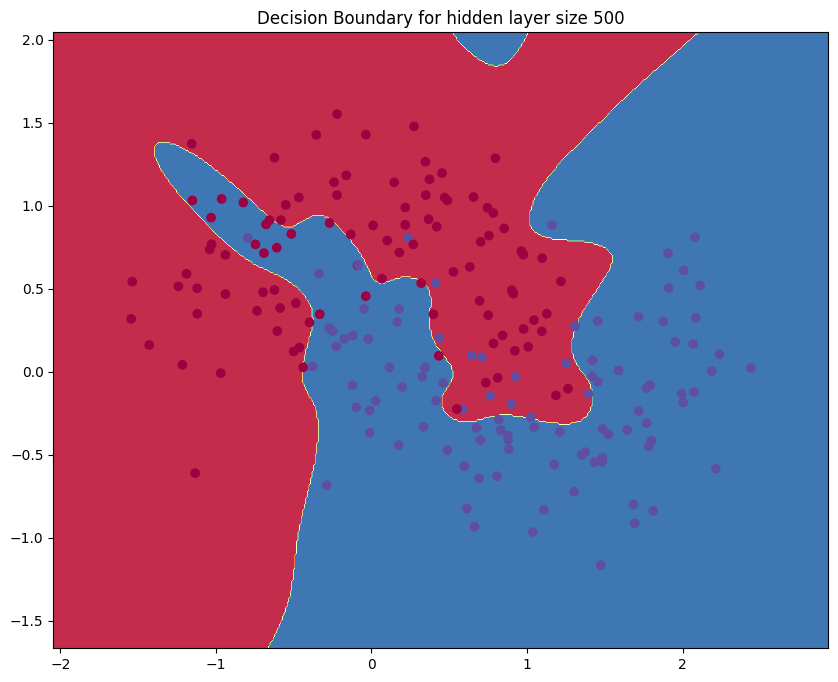

In [35]:
# Plot the decision boundary
# This might take a little while as our model is very big now
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 500")

# Keras
In this section we will build the same model with the Keras Sequential API

In [36]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)
y = y.reshape(200,1)

## Importing Keras 
When importing Keras, we usually just import the modules we will use. In this case, we need two types of layers: The `Dense` layer is the plain layer which we have gotten to know in this chapter. The `Activation` layer allows us to add an activation function. We can import them like this:

```Python 
from keras.layers import Dense, Activation
```

Keras offers two kinds of ways to build models. The sequential and the functional API. The sequential API is easier to use and allows more rapid building of models so we will use it in most of the book. In later chapters we will take a look at the functional API as well. We can access the sequential API like this:
```Python 
from keras.models import Sequential
```

In [37]:
from keras.layers import Dense, Activation
from keras.models import Sequential

## A two layer model in Keras 
Building a neural network in the sequential API works as follows:

### Stacking layers
First, we create an empty sequential model with no layers:
```Python
model = Sequential()
```
Then we can add layers to this model just like stacking a layer cake with `model.add()`. For the first layer, we have to specify the input dimensions of the layer. In our case, the data has two features, the coordinates of the point. We can add a hidden layer with hidden layer size 3 like this: 

```Python 
model.add(Dense(3,input_dim=2))
```
Note how we nest the functions: Inside `model.add()` we specify the `Dense` layer. The positional argument is the size of the layer. This `Dense` layer now only does the linear step. To add a tanh activation function, we call:

```Python 
model.add(Activation('tanh'))
```

We add the linear step and the activation function of the output layer in the same way:
```Python 
model.add(Dense(1))
model.add(Activation('sigmoid'))
```

In [38]:
model = Sequential()
model.add(Dense(3,input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

### Compiling the model 

Before we can start training the model we have to specify how exactly we want to train the model. Most importantly we need to specify which optimizer  and which loss function we want to use. The simple optimizer we have used so far is called 'Stochastic Gradient Descent' or SGD, for more optimizers, see chapter 2. The loss function we use for this binary classification problem is called 'binary crossentropy'. We can also specify which metrics we want to track during training. In our case, accuracy would be interesting to track, or just 'acc' to keep it short.

In [39]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the model 
Now we are ready to run the training process:

In [41]:
history = model.fit(X,y,epochs=900)

Epoch 1/900


7/7 [==============================] - 1s 7ms/step - loss: 0.7450 - acc: 0.3550
Epoch 2/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7346 - acc: 0.4000
Epoch 3/900
7/7 [==============================] - 0s 834us/step - loss: 0.7241 - acc: 0.4550
Epoch 4/900
7/7 [==============================] - 0s 1000us/step - loss: 0.7143 - acc: 0.5000
Epoch 5/900
7/7 [==============================] - 0s 834us/step - loss: 0.7048 - acc: 0.5300
Epoch 6/900
7/7 [==============================] - 0s 835us/step - loss: 0.6960 - acc: 0.5550
Epoch 7/900
7/7 [==============================] - 0s 1ms/step - loss: 0.6875 - acc: 0.5900
Epoch 8/900
7/7 [==============================] - 0s 837us/step - loss: 0.6794 - acc: 0.6050
Epoch 9/900
7/7 [==============================] - 0s 1000us/step - loss: 0.6715 - acc: 0.6150
Epoch 10/900
7/7 [==============================] - 0s 833us/step - loss: 0.6639 - acc: 0.6200
Epoch 11/900
7/7 [==============================] - 0s 833us/

## EJERCICIOS COMPLEMENTARIOS

1) Expandir 2 capas a 3 capas la red neuronal

2) Usando el excel --> Clasificar los tipos de vinos

3) Hacer una red neuronal de 2 capas para el Excel

## Un modelo de TRES capas en Keras
La construcción de una red neuronal en la API secuencial funciona de la siguiente manera:

### Apilamiento de capas
Primero, creamos un modelo secuencial vacío sin capas:
```Python
modelo = Secuencial()
```
Luego podemos agregar capas a este modelo tal como apilar un pastel de capas con `model.add()`. Para la primera capa, tenemos que especificar las dimensiones de entrada de la capa. En nuestro caso, los datos tienen dos características, las coordenadas del punto. Podemos agregar una capa oculta con un tamaño de capa oculta 3 como esta:

```Python
model.add(Denso(3,input_dim=2))
```
Observe cómo anidamos las funciones: dentro de `model.add()` especificamos la capa `Dense`. El argumento posicional es el tamaño de la capa. Esta capa "Densa" ahora solo realiza el paso lineal. Para agregar una función de activación tanh, llamamos:

```Python
model.add(Activación('tanh'))
```

Agregamos el paso lineal y la función de activación de la capa de salida de la misma manera:
```Python
modelo.add(Denso(1))
model.add(Activación('sigmoid'))
```

LINK: http://personal.cimat.mx:8181/~mrivera/cursos/aprendizaje_profundo/arquitecturas/arquitecturas_Keras.html

Maneras de Generar Modelos:  https://jahazielponce.com/maneras-construir-modelo-keras-tensorflow-python/


In [43]:
from keras.layers import Dropout

In [50]:
model2 = Sequential()
model2.add(Dense(3, activation='tanh',input_dim=2))
model2.add(Dense(2,activation='sigmoid'))
model2.add(Dense(1, activation='relu'))

### Compilar el Modelo

In [51]:
model2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

In [52]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 9         
                                                                 
 dense_9 (Dense)             (None, 2)                 8         
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Entrenar el Modelo

In [53]:
history = model2.fit(X,y,epochs=900)

Epoch 1/900
7/7 [==============================] - 0s 1ms/step - loss: 0.8641 - acc: 0.5000
Epoch 2/900
7/7 [==============================] - 0s 833us/step - loss: 0.6910 - acc: 0.5000
Epoch 3/900
7/7 [==============================] - 0s 833us/step - loss: 0.6535 - acc: 0.5000
Epoch 4/900
7/7 [==============================] - 0s 833us/step - loss: 0.6377 - acc: 0.5450
Epoch 5/900
7/7 [==============================] - 0s 1000us/step - loss: 0.6313 - acc: 0.7600
Epoch 6/900
7/7 [==============================] - 0s 1000us/step - loss: 0.6260 - acc: 0.7600
Epoch 7/900
7/7 [==============================] - 0s 1000us/step - loss: 0.6215 - acc: 0.7700
Epoch 8/900
7/7 [==============================] - 0s 834us/step - loss: 0.6168 - acc: 0.8000
Epoch 9/900
7/7 [==============================] - 0s 1ms/step - loss: 0.6118 - acc: 0.7950
Epoch 10/900
7/7 [==============================] - 0s 833us/step - loss: 0.6079 - acc: 0.7950
Epoch 11/900
7/7 [==============================] - 0s 834us

### AUMENTÓ LA PRECISIÖN DEL MODELO

## B) Leer EXCEL

Hacer un Random Forest

In [86]:
import pandas as pd

excel_data_df = pd.read_excel("E:/PY_MLFF/PY_MLFF/1ExcelExercise.xlsx", sheet_name=1, skiprows=1, usecols='A:M')
#excel_data_df.head()
#excel_data_df.describe()

excel_data_df.dtypes  

#data = excel_data_df.to_numpy()

# print whole sheet data
#print(data)


Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                       float64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                         float64
dtype: object